# <center>Практикум по случайным процессам</center>
<center><i>Журавлев Алексей, 396 группа</i></center>
<center><small> Задача 5 </small></center>

# Реализация алгоритма

Опишем однородную марковскую цепь, возникающую в алгоритме PageRank. Состояния марковской цепи - это номера вершин вершин графа. Зададим параметр $d$ - dumping factor, в нашем случае равный $0.85$ - вероятность перехода по случайной ссылке с текущей страницы в какой-то момент времени. Пусть $N$ - число вершин графа, $deg(i)$ - число рёбер, исходящих из вершины с номером $i$.

В любой вершине с $deg(i) > 0$ с вероятностью $d$ происходит переход по одному из рёбер(равновероятно по всем рёбрам) и с вероятностью $(1-d)$ происходт переход на случайную страницу (равновероятно по всем страницам). Если же $deg(i) = 0$, то из неё происходит переход в любую другую равновероятно. Это можно записать в терминах переходных вероятностей:

$$ p_{ij} =P(X_n=i \big{|} X_{n-1}=j) = \begin{cases}
\frac{1-d}{N} + \frac{d}{deg(i)}, \mbox{если} (i,j) \in E \\
\frac{1-d}{N}, \mbox{если} (i,j) \notin E, deg(i)>0 \\
\frac{1}{N}, иначе
\end{cases}$$

Пусть $\pi_j^n$ - вероятность нахождения в $j$-ой вершине на $n$-ом шаге.
Тогда 
$$\pi_j^n = \sum\limits_{i=1}^{n}\pi_i^{n-1}p_{ij} = \sum_{i: (i,j)\in E}\pi_i^{n-1}(\frac{1-d}{N} + \frac{d}{deg(i)}) + \sum_{i: (i,j)\notin E, deg(i)>0} \frac{1-d}{N} + \sum_{i: (i,j)\notin E, deg(i)=0} \frac{1}{N} =\\= d\sum_{i: (i,j)\in E}\frac{\pi_i^{n-1}}{deg(i)} + \frac{1-d}{N}\sum_{deg(i)>0}\pi_i^n + \frac{1}{N}\sum_{deg(i)=0}\pi_i^n$$
Положим, что $\pi_j^0 = \frac{1}{N}$ и итеративно будем пересчитывать распределение на шаге $n$, пока для каждой вершины изменение не будет превосходить заданного $\varepsilon$. Для пересчёта нам нужно знать степени всех вершин, список вершин, входящих в данную и список вершин, имеющих нулевую степень.

In [1]:
import numpy

d=0.85

def page_rank(links, epsilon=0.001):
    N = numpy.max(links) + 1
    degrees = numpy.zeros(N)
    intos = [[] for i in range(N)]
    for (i, j) in links:
        degrees[i] += 1
        intos[j].append(i)
    distribution = numpy.array([1 / N] * N)
    sink_indices = numpy.where(degrees == 0)[0]
    not_sink_indices = numpy.where(degrees != 0)[0]
    new_distribution = numpy.zeros(N)
    while True:
        for i in numpy.arange(N):
            slice_indeces = numpy.array(intos[i], dtype = int)
            new_distribution[i] = d * numpy.sum(distribution[slice_indeces] / degrees[slice_indeces]) \
                                  + (1 - d) / N * numpy.sum(distribution[not_sink_indices]) \
                                  + 1 / N * numpy.sum(distribution[sink_indices])
        if max(abs(new_distribution - distribution)) < epsilon:
            break
        distribution = numpy.copy(new_distribution)
    return new_distribution

# Примеры запуска

Возьмём пример подсчёта PageRank с <a href="https://en.wikipedia.org/wiki/PageRank">соответствующей страницы на Википедии</a>. Зададим этот граф и посчитаем значение PageRank.

In [2]:
edges = numpy.array([(2, 1), (2, 3), (3, 4), (4, 3), (7, 3), (8, 3), (9, 3), (6, 2),
                     (6, 3), (5, 3), (7, 6), (8, 6), (9, 6), (10, 6), (0, 6), (6, 5), (5, 6)])
for res in page_rank(edges):
    print('%1.2f' % (res * 100), '%')

1.62 %
3.28 %
3.91 %
38.40 %
34.33 %
3.91 %
8.09 %
1.62 %
1.62 %
1.62 %
1.62 %


Значения такие же, как и по ссылке. Построенный граф можно нарисовать и убедиться, что он выглядит так же

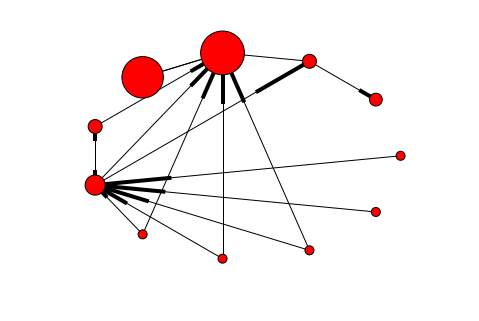

In [3]:
%matplotlib inline

import networkx

G=networkx.DiGraph()
G.add_edges_from(edges)
networkx.draw_circular(G, node_size = 5000 * page_rank(edges))

Сделаем ещё несколько запусков на различных графах.

16.67 %
16.67 %
16.67 %
16.67 %
16.67 %
16.67 %


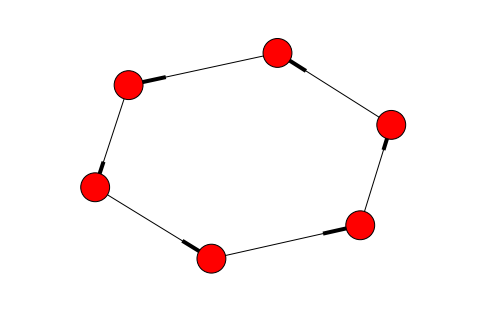

In [4]:
def output_info(edges):
    pr = page_rank(edges)
    for res in pr:
        print('%1.2f' % (res * 100), '%')
    G=networkx.DiGraph()
    G.add_edges_from(edges)
    networkx.draw(G, node_size = 5000 * pr)

edges = numpy.array([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)])
output_info(edges)

20.79 %
10.64 %
10.64 %
10.64 %
10.64 %
10.64 %
10.64 %
7.70 %
7.70 %


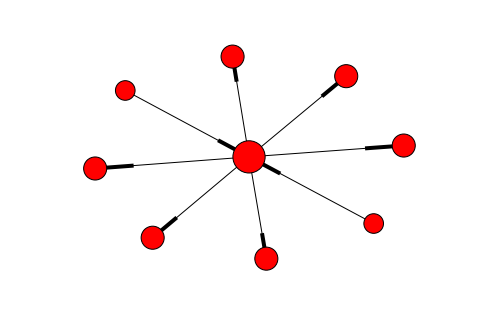

In [5]:
edges = numpy.array([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 0), (8, 0)])
output_info(edges)

49.86 %
7.16 %
7.16 %
7.16 %
7.16 %
7.16 %
7.16 %
7.16 %


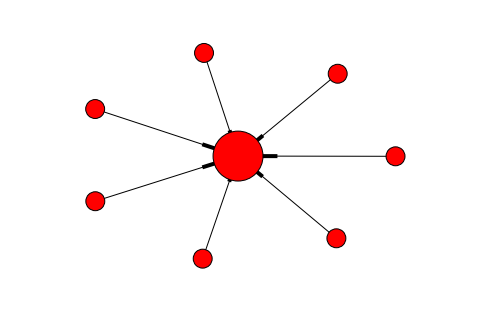

In [6]:
edges = numpy.array([(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)])
output_info(edges)